# Online Sales Dataset Popular Marketplace

In [42]:
# !conda install sklearn -y

In [43]:
import pandas as pd;import matplotlib.pyplot as plt;from sklearn.model_selection import train_test_split;from sklearn.linear_model import LinearRegression;from sklearn.metrics import mean_absolute_error
sales = pd.read_csv('data/Online Sales Data.csv');sales.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [44]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [45]:
sales.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


<Axes: xlabel='Transaction ID', ylabel='Total Revenue'>

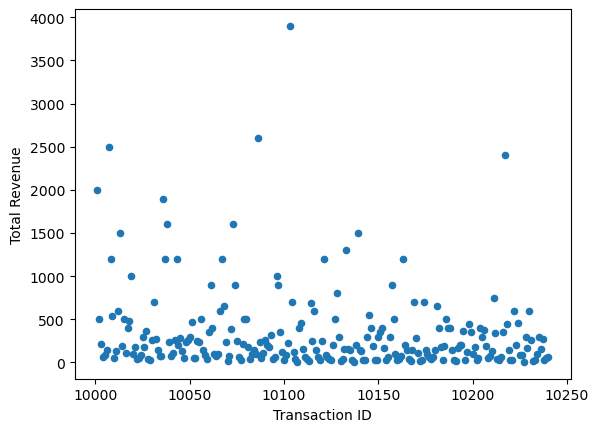

In [46]:
%matplotlib inline
sales.plot(kind="scatter",x='Transaction ID',y='Total Revenue')

<Axes: xlabel='Units Sold', ylabel='Total Revenue'>

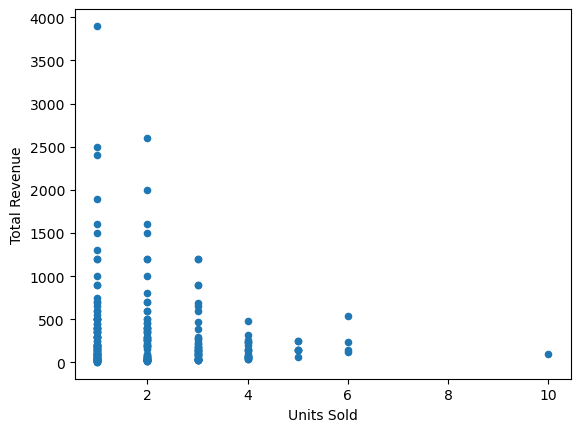

In [47]:
sales.plot(kind='scatter',x='Units Sold',y='Total Revenue')

<Axes: xlabel='Unit Price', ylabel='Total Revenue'>

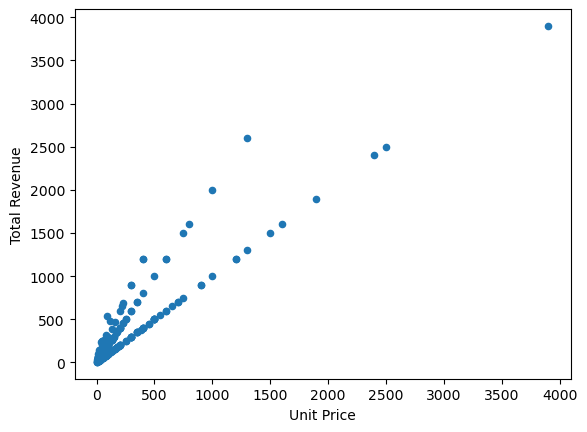

In [48]:
sales.plot(kind='scatter',x='Unit Price',y='Total Revenue')

In [49]:
d='Date';pc='Product Category';pn='Product Name';pm='Payment Method';r='Region';response='Total Revenue';y=sales[[response]];y

,Total Revenue
0,1999.98
1,499.99
2,209.97
3,63.96
4,89.99
...,...
235,159.99
236,270.00
237,32.97
238,55.00


In [50]:
predictors=list(sales.columns);predictors.remove(d);predictors.remove(pn);predictors.remove(pm);predictors.remove(pc);predictors.remove(r);predictors.remove(response);x=sales[predictors];x

,Transaction ID,Units Sold,Unit Price
0,10001,2,999.99
1,10002,1,499.99
2,10003,3,69.99
3,10004,4,15.99
4,10005,1,89.99
...,...,...,...
235,10236,1,159.99
236,10237,3,90.00
237,10238,3,10.99
238,10239,1,55.00


In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1234);model=LinearRegression().fit(x_train,y_train);model.intercept_

array([6523.39551546])

In [53]:
model.coef_

array([[-0.64501498, 39.20426927,  1.11716434]])

In [54]:
model.score(x_test,y_test)

0.9480479953854344

In [56]:
y_pred=model.predict(x_test);mean_absolute_error(y_test,y_pred)

73.69374688973264